In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import random
import scipy
from distcorr import distcorr
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [4]:
x = np.array([400, 405, 410, 415, 420, 425, 430, 435, 436, 438, 439, 441, 442, 444, 445, 447, 448, 450, 451, 453, 454, 456, 457, 459, 460, 462, 463, 465, 470, 475, 480, 485, 490, 495, 500])

y = np.array([0.0001575, 0.0001699, 0.0002350, 0.0003102, 0.0004917, 0.0008710, 0.0017418, 0.0046400, 0.0065895, 0.0097302, 0.0149002, 0.0237310, 0.0401683, 0.0712559, 0.1264458, 0.2073413, 0.2902366, 0.3445623, 0.3698049, 0.3668534, 0.3106727, 0.2078154, 0.1164354, 0.0616764, 0.0337200, 0.0194023, 0.0117831, 0.0074357, 0.0022732,0.0008800, 0.0004579, 0.0002345, 0.0001586, 0.0001143, 0.0000710])

In [5]:
corr, _ = pearsonr(x, y)
print(corr)

0.03283050839380204


In [6]:
dist_corr = scipy.spatial.distance.correlation(x, y)
print(dist_corr)

0.967169491606198


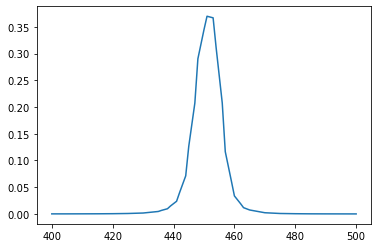

In [7]:
plt.plot(x, y)

In [8]:
x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

x_scaled = (x_scaler.fit_transform(x.reshape(-1,1)))
y_scaled = (y_scaler.fit_transform(y.reshape(-1,1)))

In [9]:
x_scaled

array([[0.  ],
       [0.05],
       [0.1 ],
       [0.15],
       [0.2 ],
       [0.25],
       [0.3 ],
       [0.35],
       [0.36],
       [0.38],
       [0.39],
       [0.41],
       [0.42],
       [0.44],
       [0.45],
       [0.47],
       [0.48],
       [0.5 ],
       [0.51],
       [0.53],
       [0.54],
       [0.56],
       [0.57],
       [0.59],
       [0.6 ],
       [0.62],
       [0.63],
       [0.65],
       [0.7 ],
       [0.75],
       [0.8 ],
       [0.85],
       [0.9 ],
       [0.95],
       [1.  ]])

In [10]:
y_scaled

array([[2.33952040e-04],
       [2.67489673e-04],
       [4.43562248e-04],
       [6.46951767e-04],
       [1.13784535e-03],
       [2.16371828e-03],
       [4.51892564e-03],
       [1.23575361e-02],
       [1.76302471e-02],
       [2.61247346e-02],
       [4.01077640e-02],
       [6.39919683e-02],
       [1.08449076e-01],
       [1.92530087e-01],
       [3.41799332e-01],
       [5.60593173e-01],
       [7.84795768e-01],
       [9.31727656e-01],
       [1.00000000e+00],
       [9.92017232e-01],
       [8.40068222e-01],
       [5.61875446e-01],
       [3.14724725e-01],
       [1.66620913e-01],
       [9.10086957e-02],
       [5.22843591e-02],
       [3.16771062e-02],
       [1.99189201e-02],
       [5.95617551e-03],
       [2.18806012e-03],
       [1.04642826e-03],
       [4.42209924e-04],
       [2.36927152e-04],
       [1.17111252e-04],
       [0.00000000e+00]])

In [11]:
print(x_scaled.reshape(35))

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.36 0.38 0.39 0.41 0.42 0.44
 0.45 0.47 0.48 0.5  0.51 0.53 0.54 0.56 0.57 0.59 0.6  0.62 0.63 0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [12]:
corr, _ = pearsonr(x_scaled.reshape(35), y_scaled.reshape(35))
print(corr)

0.03283050839380205


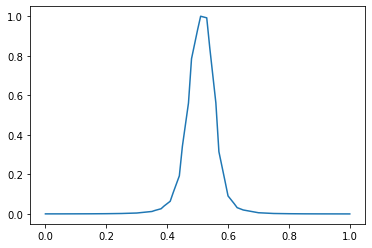

In [13]:
plt.plot(x_scaled, y_scaled)

In [14]:
bins = np.linspace(0, 0.4, 5)

y_binned = np.digitize(y_scaled, bins)

In [15]:
y_binned

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [4],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [4],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, stratify=y_binned, random_state=0)

In [17]:
x_train = torch.from_numpy(x_train)
x_train = x_train.view(1, x_train.shape[0], 1)

x_test = torch.from_numpy(x_test)
x_test = x_test.view(1, x_test.shape[0], 1)

y_train = torch.from_numpy(y_train)
y_train = y_train.view(1, y_train.shape[0], 1)

y_test = torch.from_numpy(y_test)
y_test = y_test.view(1, y_test.shape[0], 1)

x_train.shape

torch.Size([1, 26, 1])

In [18]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.enc1 = nn.Linear(in_features=1, out_features=2)
        self.enc2 = nn.Linear(in_features=2, out_features=4)
        self.enc3 = nn.Linear(in_features=4, out_features=8)

        self.dec00 = nn.Linear(in_features=8, out_features=4)
        self.dec0 = nn.Linear(in_features=4, out_features=2)
        self.dec1 = nn.Linear(in_features=2, out_features=1)

    
    def forward(self, x):
        x = F.leaky_relu(self.enc1(x))
        x = F.leaky_relu(self.enc2(x))
        x = F.leaky_relu(self.enc3(x))
        x = F.leaky_relu(self.dec00(x))
        x = F.leaky_relu(self.dec0(x))
        x = self.dec1(x)
        return x


In [19]:
random.seed(2)
torch.manual_seed(random.randint(1, 10))
net = Autoencoder().double()
print(net)

Autoencoder(
  (enc1): Linear(in_features=1, out_features=2, bias=True)
  (enc2): Linear(in_features=2, out_features=4, bias=True)
  (enc3): Linear(in_features=4, out_features=8, bias=True)
  (dec00): Linear(in_features=8, out_features=4, bias=True)
  (dec0): Linear(in_features=4, out_features=2, bias=True)
  (dec1): Linear(in_features=2, out_features=1, bias=True)
)


In [20]:
NUM_EPOCHS = 2000
LEARNING_RATE = 0.01

In [21]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [22]:
def train(net):
    train_loss = []
    torch.set_printoptions(precision=3, sci_mode=False)
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for missing_data, full_data in zip(x_train, y_train):
            optimizer.zero_grad()
            outputs = net(missing_data.double())
            loss = criterion(outputs, full_data)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if epoch == NUM_EPOCHS-1:
                for i in range(len(missing_data)):
                    print("Input: ", missing_data[i])
                    print("Target: ", full_data[i])
                    print("Outputs: ", outputs[i])

        loss = running_loss / len(x_train)
        train_loss.append(loss)

        print('Epoch {} of {}, Train Loss: {:.3f}'
            .format(epoch+1, NUM_EPOCHS, loss))

    return train_loss


def test(net):

    net.eval()

    with torch.no_grad():
        test_loss = []
        running_loss = 0.0

        for missing_data, full_data in zip(x_test, y_test):
            outputs = net(missing_data.double())
            loss = criterion(outputs, full_data)
            running_loss += loss.item()
            for i in range(len(missing_data)):
                    print("Input: ", missing_data[i])
                    print("Target: ", full_data[i])
                    print("Outputs: ", outputs[i])

        loss = running_loss / len(x_test)
        test_loss.append(loss)
        print('Test Loss: {:.3f}'.format(loss))

        return test_loss

In [23]:
train_loss1 = train(net)


0.000
Epoch 1587 of 2000, Train Loss: 0.000
Epoch 1588 of 2000, Train Loss: 0.000
Epoch 1589 of 2000, Train Loss: 0.000
Epoch 1590 of 2000, Train Loss: 0.000
Epoch 1591 of 2000, Train Loss: 0.000
Epoch 1592 of 2000, Train Loss: 0.000
Epoch 1593 of 2000, Train Loss: 0.000
Epoch 1594 of 2000, Train Loss: 0.000
Epoch 1595 of 2000, Train Loss: 0.000
Epoch 1596 of 2000, Train Loss: 0.000
Epoch 1597 of 2000, Train Loss: 0.000
Epoch 1598 of 2000, Train Loss: 0.000
Epoch 1599 of 2000, Train Loss: 0.000
Epoch 1600 of 2000, Train Loss: 0.000
Epoch 1601 of 2000, Train Loss: 0.000
Epoch 1602 of 2000, Train Loss: 0.000
Epoch 1603 of 2000, Train Loss: 0.000
Epoch 1604 of 2000, Train Loss: 0.000
Epoch 1605 of 2000, Train Loss: 0.000
Epoch 1606 of 2000, Train Loss: 0.000
Epoch 1607 of 2000, Train Loss: 0.000
Epoch 1608 of 2000, Train Loss: 0.000
Epoch 1609 of 2000, Train Loss: 0.000
Epoch 1610 of 2000, Train Loss: 0.000
Epoch 1611 of 2000, Train Loss: 0.000
Epoch 1612 of 2000, Train Loss: 0.000
Epoch 

Text(0, 0.5, 'Loss')

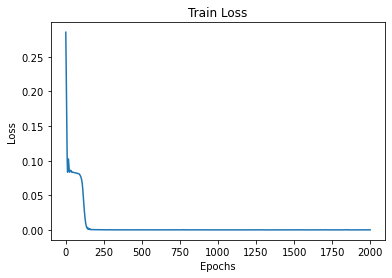

In [26]:
plt.figure()
plt.plot(train_loss1)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [25]:
test_result = test(net)

Input:  tensor([0.150], dtype=torch.float64)
Target:  tensor([0.001], dtype=torch.float64)
Outputs:  tensor([0.004], dtype=torch.float64)
Input:  tensor([0.], dtype=torch.float64)
Target:  tensor([0.000], dtype=torch.float64)
Outputs:  tensor([-0.004], dtype=torch.float64)
Input:  tensor([0.440], dtype=torch.float64)
Target:  tensor([0.193], dtype=torch.float64)
Outputs:  tensor([0.218], dtype=torch.float64)
Input:  tensor([0.850], dtype=torch.float64)
Target:  tensor([0.000], dtype=torch.float64)
Outputs:  tensor([0.004], dtype=torch.float64)
Input:  tensor([0.530], dtype=torch.float64)
Target:  tensor([0.992], dtype=torch.float64)
Outputs:  tensor([0.944], dtype=torch.float64)
Input:  tensor([0.350], dtype=torch.float64)
Target:  tensor([0.012], dtype=torch.float64)
Outputs:  tensor([0.024], dtype=torch.float64)
Input:  tensor([0.510], dtype=torch.float64)
Target:  tensor([1.000], dtype=torch.float64)
Outputs:  tensor([0.976], dtype=torch.float64)
Input:  tensor([0.600], dtype=torch.

In [24]:
torch.save(net, './model2')

In [25]:
load_model = torch.load('model2')
load_model

Autoencoder(
  (enc1): Linear(in_features=1, out_features=2, bias=True)
  (enc2): Linear(in_features=2, out_features=4, bias=True)
  (enc3): Linear(in_features=4, out_features=8, bias=True)
  (dec00): Linear(in_features=8, out_features=4, bias=True)
  (dec0): Linear(in_features=4, out_features=2, bias=True)
  (dec1): Linear(in_features=2, out_features=1, bias=True)
)

In [63]:
predicted_value = predicted.reshape(-1, 1).detach().numpy()
expected_value = y_test.reshape(-1, 1).detach().numpy()
comparison_column = x_test.reshape(-1, 1).detach().numpy()


In [64]:
print(distcorr(comparison_column.flatten(), expected_value.flatten()))
print(distcorr(comparison_column.flatten(), predicted_value.flatten()))

0.46299543329545345
0.4732267063479976


In [36]:
from scipy import stats
from statsmodels.stats import weightstats as stets

ttest, pval = stats.ttest_ind(predicted, expected_value)
print("P-value for significance: ", pval)
print("TTEST: ", ttest)

if pval<0.05:
    print("Conclusion: Reject Null Hypothesis")
else:
    print("Conclusion: Accept Null Hypothesis")

P-value for significance:  [0.99214528]
TTEST:  [-0.00999953]
Conclusion: Accept Null Hypothesis


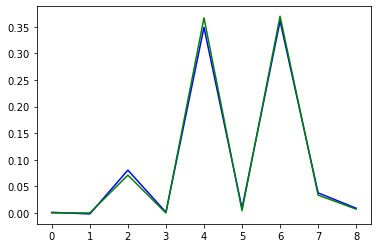

In [31]:
# Plot in blue color the predicted adata and in green color the
# actual data to verify visually the accuracy of the model.
plt.plot(y_scaler.inverse_transform(predicted), color="blue")
plt.plot(y_scaler.inverse_transform(expected_value), color="green")
plt.show()